<a href="https://colab.research.google.com/github/israguesmi/AI-900-AIFundamentals/blob/main/Sujet_etudiant_TP_Jeux_video_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Ce document est le TP n°1 du module IA de l'université de Toulouse.  Il reprend rapidement des éléments du cours et propose une mise en pratique interactive des notions de densité, de variance et de normalité.

Vous êtes un jeune entrepreneur désireux de faire fortune dans les jeux vidéo. Comme vous avez beaucoup d'imagination mais peu d'argent, vous souhaitez investir là où vous êtes sûr de faire du profit. Vous allez observer des données issues de ventes de jeux vidéo afin de faire votre propre étude de marché.

Cet ensemble de données contient une liste de jeux vidéo du genre "Action'. Il a été généré par le site de vgchartz.com.


Les champs incluent
*   name : Nom du jeu
*   console : Plate-forme de la version des jeux (c'est-à-dire PC, PS4, etc.)
*   genre : Genre du jeu
*   publisher : Éditeur du jeu
*   na_sales : Ventes en Amérique du Nord (en millions)
*   pal_sales : Ventes en dans les pays du réseau Pal (en millions)
*   jp_sales : Ventes au Japon (en millions)
*   other_sales : Ventes dans le reste du monde (en millions)
*   total_sales : Total des ventes mondiales.



Après avoir téléchargé le fichier vgchartz-2_1_2024.csv chargez-le dans le fichier jupyter

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgchartz-2_1_2024.csv to vgchartz-2_1_2024.csv


La fonction read\_csv() de la librairie Pandas lit des données de type csv pour les stocker dans un dataframe.

À moins de vouloir faire frémir un statisticien, vous ne touchez pas aux données originales (car vous risquez de faire n'importe quoi au cours de ce T. P. sur ces pauvres données qui n'ont rien demandé).
Il faut donc copier les données dans un deuxième

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data = pd.read_csv('vgchartz-2_1_2024.csv')


Stocker les données dans une variable df avec la fonction pd.read_csv() (elles sont présentent sous le nom vgchartz-2_1_2024.csv). On note cette variable df pour dataframe.


In [4]:
df = pd.read_csv('vgchartz-2_1_2024.csv')

Il est temps de distinguer une tendance sur les données! Pour cela, la fonction describe() vous donne des informations sur la répartition sur toute vos variables numériques.

Appliquer la fonction describe() à votre dataframe

In [5]:
df.describe()

,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,1043.000000,4334.000000,257.000000,4303.000000,11797.000000,9941.000000,4008.000000,9271.000000,10622.000000
mean,7.627709,7.387425,8.474708,5.028706,0.550432,0.333056,0.155322,0.205720,0.061593
std,1.338636,1.367820,1.237067,21.645171,0.982478,0.546074,0.201680,0.454762,0.149068
min,2.000000,1.500000,2.000000,0.070000,0.070000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.600000,8.000000,0.260000,0.130000,0.090000,0.040000,0.030000,0.010000
50%,8.000000,7.600000,8.800000,1.000000,0.260000,0.160000,0.090000,0.080000,0.020000
75%,8.600000,8.400000,9.300000,3.000000,0.560000,0.350000,0.190000,0.200000,0.050000
max,9.700000,10.000000,10.000000,520.000000,20.320000,9.760000,2.130000,9.850000,3.120000


Cherchez et citez à quoi correspond un objet de type "\textit{dataframe}" sous Python.


↪ Un objet de type "dataframe" sous Python, spécifiquement avec la bibliothèque Pandas, est une structure de données bidimensionnelle, potentiellement hétérogène, avec des axes étiquetés (lignes et colonnes). Il est similaire à une feuille de calcul Excel ou à une table SQL. Un DataFrame permet de stocker et de manipuler des données avec un ensemble riche de fonctions pour accéder, filtrer, transformer, et analyser les données.

*Vérifiez* la moyenne de la colonne jp_sales avec la fonction mean(). Comparez avec celle donnée par la fonction describe().


↪ Moyenne de jp_sales avec mean(): **0.15532185628742515**
**et Moyenne de jp_sales avec describe(): 0.15532185628742515**
La moyenne de la colonne `jp_sales` obtenue avec la fonction `mean()` et celle obtenue à partir de la fonction `describe()` sont exactement les mêmes, soit 0.15532185628742515. Cela indique que les deux méthodes fournissent un résultat cohérent pour le calcul de la moyenne des ventes au Japon, démontrant la fiabilité des fonctions de Pandas pour l'analyse statistique des données.

Quel a été le plus vendu?


In [6]:
# Calcul de la moyenne de la colonne jp_sales
mean_jp_sales = df['jp_sales'].mean()

# Affichage de la moyenne calculée
print("Moyenne de jp_sales avec mean():", mean_jp_sales)

# Utilisation de describe() pour obtenir la moyenne (et d'autres statistiques) pour toutes les colonnes numériques
describe_output = df.describe()

# Affichage de la partie concernant jp_sales de la sortie de describe(), pour comparer la moyenne
print("Moyenne de jp_sales avec describe():\n", describe_output.loc['mean']['jp_sales'])
print(f"Moyenne de jp_sales avec mean(): {df['jp_sales'].mean()}, Moyenne de jp_sales avec describe(): {df.describe().loc['mean']['jp_sales']}")

# Trouver l'indice de la ligne avec le plus haut total de ventes
index_max_sales = df['total_sales'].idxmax()

# Afficher les informations du jeu le plus vendu
most_sold_game = df.loc[index_max_sales]
print("Le jeu le plus vendu est :\n", most_sold_game)


Moyenne de jp_sales avec mean(): 0.15532185628742515
Moyenne de jp_sales avec describe():
 0.15532185628742515
Moyenne de jp_sales avec mean(): 0.15532185628742515, Moyenne de jp_sales avec describe(): 0.15532185628742515
Le jeu le plus vendu est :
 img              /games/boxart/full_6510540AmericaFrontccc.jpg
title                                       Grand Theft Auto V
console                                                    PS3
genre                                                   Action
publisher                                       Rockstar Games
developer                                       Rockstar North
vg_score                                                   9.5
critic_score                                               9.4
user_score                                                 NaN
total_shipped                                              NaN
total_sales                                              20.32
na_sales                                                 



Quel zone géographique a eu les meilleures ventes?


↪ il suffit de comparer les ventes dans les différentes zones géographiques listées, à savoir `na_sales` (ventes en Amérique du Nord), `jp_sales` (ventes au Japon), `pal_sales` (ventes dans les pays du réseau PAL, principalement Europe et Australie), et `other_sales` (ventes dans le reste du monde). D'après les informations fournies, voici les ventes pour "Grand Theft Auto V" sur PS3 :

- Ventes en Amérique du Nord (NA) : 6.37 millions
- Ventes au Japon (JP) : 0.99 million
- Ventes dans les pays du réseau PAL : 9.85 millions
- Ventes dans le reste du monde : 3.12 millions

En se basant sur ces chiffres, la zone géographique qui a eu les meilleures ventes pour "Grand Theft Auto V" sur PS3 est celle des pays du réseau PAL, avec 9.85 millions d'unités vendues.

## Notion de densité

Vous allez observer la densité de probabilité des données. En physique, la densité ou densité d'un corps est le rapport de sa masse volumique à la masse volumique d'un corps pris comme référence, c'est à dire que nous comparons le nombre d'une variable par rapport à un ensemble de variables observées. En théorie des probabilités ou en statistique, une densité de probabilité est une fonction qui permet de représenter une loi de probabilité sous forme d'intégrales.
 Dans un histogramme, la densité en un point $x$ est estimée par la proportion d'observations $x_1, x_2, ..., x_N$ qui se trouvent à proximité de $x$. Pour cela, nous traçons une boîte en $x$ et dont la largeur est définie par un paramètre de lissage $h$ (soit la largeur de la  boîte); nous comptons ensuite le nombre d'observations qui appartiennent à cette boîte.
Le problème avec les histogrammes, c'est que :
*  nous devons définir le paramètre $h$ (dans R il est calculé automatiquement)
*  les histogrammes produisent une estimation de la fréquence non continue.


La fonction plot(kind = 'density') fournit une estimation par noyau (ou encore méthode de Parzen-Rosenblatt, 1962). C'est une méthode non paramétrique d’estimation de la densité de probabilité d’une variable aléatoire. Elle se base sur un échantillon d’une population et permet d’estimer la densité de probabilité en tout point du support (intervalle min et max des valeurs observées).

Cette méthode du noyau consiste à retrouver la continuité : pour cela, nous remplaçons la boîte centrée en $x$ et de largeur $h$ par une loi gaussienne (définie par la suite) centrée en $x$. Plus une observation est proche du point de support $x$ plus la courbe en cloche lui donnera une valeur numérique importante. À l'inverse, les observations trop éloignées de $x$ se voient affecter d'une valeur numérique négligeable. Notez également que plus il y a d'observations dans le voisinage d'un point, plus sa densité est élevée. La méthode du noyau  est plus précise qu'un simple histogramme (fonction hist())

Affichons les total_sales à l'aide des fonctions hist() et plot()

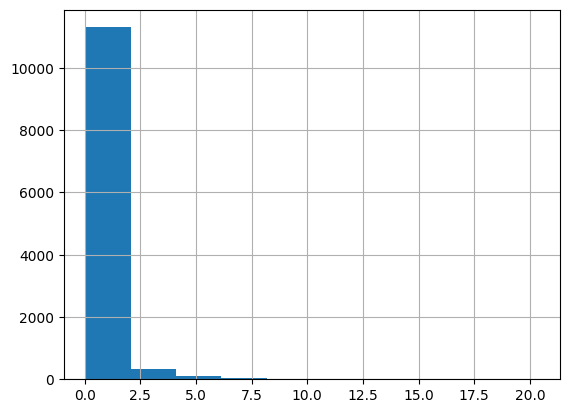

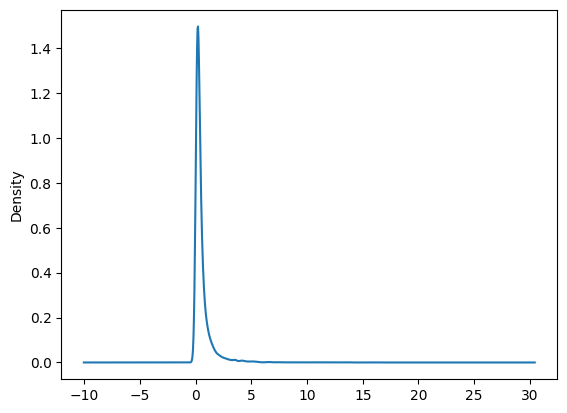

In [7]:
df["total_sales"].hist()
plt.show()


df["total_sales"].plot(kind = 'density')
plt.show()

**Affichons** l'histogramme par année

In [8]:
def extract_year(df, date_column):
    df['Year'] = pd.to_datetime(df[date_column]).dt.year
    return df

In [9]:
pd.to_datetime(df.iloc[[176]]['release_date']).dt.year

176    2013
Name: release_date, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


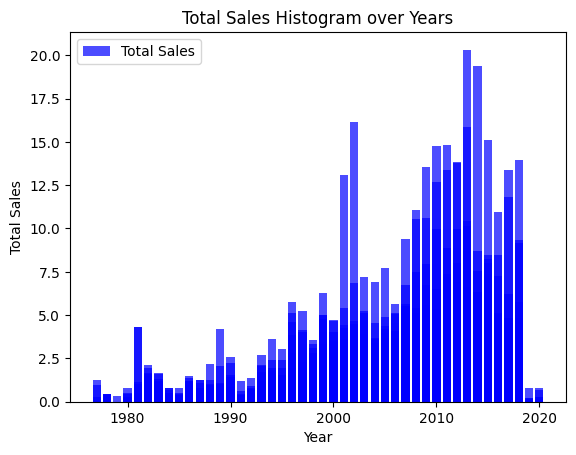

In [10]:
import matplotlib.pyplot as plt

df_temp =  extract_year(df, 'release_date')
plt.bar(df_temp['Year'], df_temp['total_sales'], color='blue', alpha=0.7, label='Total Sales')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Histogram over Years')
plt.legend()


Y-a-il une année qui se démarque des autres? Laquelle?

↪
j'ai remarqué qu'il y a des années remarquables dans ce histogramme:   il  montre des tendances intéressantes, en particulier pour les années 2001 et 2002, qui ont connu une croissance significative par rapport aux cinq années suivantes et à toutes celles qui les précédaient. Cette période pourrait refléter un moment dynamique dans l'industrie du jeu, marqué par des avancées technologiques, des sorties de consoles de nouvelle génération ou des jeux emblématiques qui ont captivé l'audience mondiale. Ensuite, après une décennie de croissance, les années 2013 et 2014 représentent des pics notables, témoignant potentiellement de l'émergence de titres révolutionnaires ou de l'expansion de la démographie des joueurs. Cependant, une baisse inattendue survient en 2019 et 2020, années marquées par la pandémie de COVID-19, qui a pu avoir un impact sur les habitudes d'achat et la distribution de jeux, malgré l'augmentation globale de la demande de divertissement à domicile durant cette période. Cette baisse pourrait être attribuée à des retards dans la production et le lancement de nouveaux jeux ou à des changements dans les dépenses de consommation en raison de l'incertitude économique mondiale.


**Pourquoi certaines valeurs extrêmes peuvent-elles fausser l'interprétation d'une variable ?**






↪  Les valeurs extrêmes peuvent fausser l'interprétation d'une variable car elles peuvent influencer de manière disproportionnée les statistiques récapitulatives, telles que la moyenne, ce qui rend difficile l'appréciation précise des tendances centrales d'un ensemble de données. De plus, elles peuvent entraîner des distorsions dans la représentation graphique, comme nous l'avons observé avec la densité, et compromettre la performance des modèles prédictifs en les orientant excessivement vers ces anomalies.

Utilisez l'option kind='box' de la fonction plot sur votre dataframe df. À quoi ce graphique correspond-t-il ?

↪ Ce graphique présente un boxplot, qui illustre la distribution des ventes totales de jeux vidéo. La boîte centrale représente la moitié médiane des données, encadrée par les quartiles inférieur et supérieur, avec une ligne indiquant la médiane. Les moustaches s'étendent jusqu'aux valeurs les plus éloignées qui ne sont pas considérées comme extrêmes, et les points au-delà représentent des outliers, signalant des ventes exceptionnellement élevées par rapport à la norme. Ce boxplot révèle que, bien que la majorité des jeux aient des ventes modestes, quelques-uns ont des performances de vente remarquablement élevées. Alors ,l'option boxplot() permet de créer un graphique représentant la distribution d'un ensemble de données numériques sous forme de boîtes avec des moustaches. Elle permet de personnaliser le graphique en spécifiant différents paramètres et cela va nous permettre d'adapter le graphique en fonction de ce qu'on a et de mieux visualiser la distribution de leurs données , et donc les valeurs extrêmes peuvent potentiellement perturber l'interprétation des résultats car elles sont très éloignées des autres valeurs et peuvent fausser les mesures de tendance centrale et de dispersion des données.

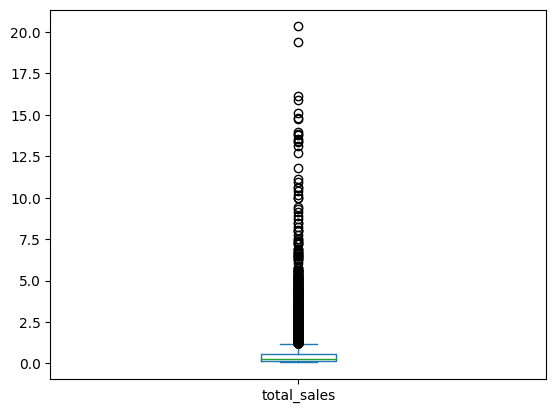

In [12]:

df["total_sales"].plot(kind='box' )
plt.show()

Notre dataset n'est supposé avoir que des jeux du genre 'Action'. Vérifions cela...

<Axes: xlabel='genre', ylabel='pal_sales'>

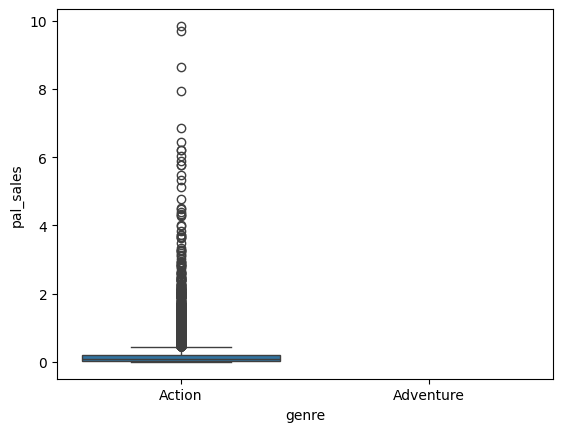

In [13]:
import seaborn as sns

#sns.set(rc={'figure.figsize':(11.7,8.27)})

#create boxplot by group
sns.boxplot(x='genre', y='pal_sales', data=df)

Supprimez du dataset df les jeux d'un autre genre que celui d'action

In [16]:
df = df[df['genre'] == 'Action']

## La variance

Observons la variance pour l'une des plateformes

In [17]:
df_Ubisoft = df["pal_sales"][df["publisher"]== "Ubisoft"]


In [18]:
var = np.var(df_Ubisoft)

print(var)


0.2095141760426728


In [19]:
var = np.var(df_Ubisoft,ddof=1)

print(var)


0.209823650453371


Quel est la différence entre les deux fonctions ? Laquelle faut-il utilser ?

↪ Les deux appels à la fonction `np.var()` calculent la variance des ventes PAL pour les jeux publiés par Ubisoft. La différence réside dans le paramètre `ddof`: par défaut, `np.var()` utilise `ddof=0` et donne la variance de la population. Quand `ddof=1` est utilisé, la fonction calcule la variance de l'échantillon, ce qui est approprié pour les échantillons de données et non l'ensemble de la population. En statistiques, on utilise `ddof=1` pour obtenir une estimation non biaisée de la variance si les données représentent un échantillon d'une plus grande population.

 La variance permet d'obtenir l'écart type, qui est la racine carrée de la variance. Pourquoi l'écart-type est souvent plus parlant que la variance pour appréhender la dispersion?


↪ L'écart-type est souvent préféré à la variance pour mesurer la dispersion car il est exprimé dans la même unité de mesure que les données originales, ce qui le rend plus intuitif et plus facile à interpréter par rapport aux valeurs réelles de l'ensemble de données.

Donner la variance des pal_sales du publisher Nintendo.
Comparer avec celle d'Ubisoft

In [20]:
import numpy as np

# Calculate variance for Nintendo
df_nintendo = df["pal_sales"][df["publisher"] == "Nintendo"]
var_nintendo = np.var(df_nintendo, ddof=1)

# Calculate variance for Ubisoft
df_ubisoft = df["pal_sales"][df["publisher"] == "Ubisoft"]
var_ubisoft = np.var(df_ubisoft, ddof=1)

# Output the results
print(f"Nintendo PAL sales variance: {var_nintendo}")
print(f"Ubisoft PAL sales variance: {var_ubisoft}")


Nintendo PAL sales variance: 0.010814661269082574
Ubisoft PAL sales variance: 0.209823650453371


↪ La variance des ventes PAL de Nintendo est significativement plus faible que celle d'Ubisoft, indiquant une dispersion des ventes chez Nintendo plus homogène par rapport à Ubisoft.

L'analyse de la variance permet d'étudier par exemple le comportement d'une variable qualitative à expliquer en fonction d'une ou de plusieurs variables nominales catégorielles.
Cependant, certain tests sont applicables uniquement si les données suivent une loi normal. Il existe des tests statistiques permettant de savoir si une distribution suit la loi normale.


## Un modèle dit "gaussien"

En théorie des probabilités et en statistique, la loi normale est l'une des lois de probabilités les plus adaptées pour modéliser des phénomènes naturels issus de plusieurs événements aléatoires. Elle est en lien avec de nombreux objets mathématiques dont le mouvement brownien, le bruit blanc gaussien pour ne citez qu'eux. Elle est également appelée loi gaussienne, loi de Gauss ou loi de Laplace-Gauss des noms de Laplace (1749-1827) et Gauss (1777-1855), deux mathématiciens, astronomes et physiciens qui l'ont étudiée.

Plus formellement, c'est une loi de probabilités absolument continue qui dépend de deux paramètres : son espérance, un nombre réel noté $\mu$, et son écart type, un nombre réel strictement positif noté $\sigma $. La densité de probabilité de la loi normale est donnée par :
$$
    f(x) = \frac{1}{\sigma \sqrt{2 \pi }} \exp{ \left( -  \frac{1}{2}  (\frac{x - \mu }{\sigma })^2 \right)}.
$$



La courbe de cette densité est appelée courbe de Gauss ou \textbf{courbe en cloche}, entre autres. C'est la représentation la plus connue de cette loi. La loi normale d'espérance nulle et d'écart type unitaire est appelée loi normale centrée réduite ou loi normale standard.

Lorsqu'une variable aléatoire X suit la loi normale, elle est dite gaussienne ou normale et il est habituel d'utiliser la notation avec la variance $\sigma^2$.
Vous comprenez peut-être maintenant pourquoi nous vous avons obligé à connaître la fonction exponentielle. C'est grâce à cette fonction qu'on modélise cette forme de cloche représentative de la gaussienne.
Nous allons essayer de comprendre le pic important suite à notre fonction density().

En statistique, le test de Shapiro–Wilk teste l'hypothèse nulle (aussi appelé hypothèse $H_o$) selon laquelle un échantillon analysé est issu d'une population normalement distribuée. Nous allons regarder si les ventes  sont normalement distribuée pour différents genre

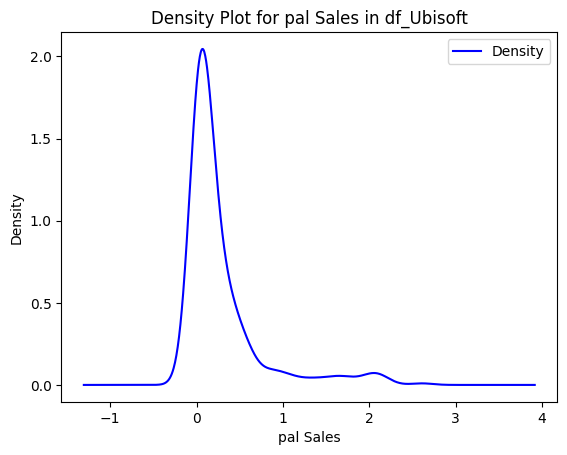

In [21]:
df_Ubisoft.plot(kind='kde', color='blue', label='Density')

plt.xlabel('pal Sales')
plt.ylabel('Density')
plt.title('Density Plot for pal Sales in df_Ubisoft')

plt.legend()
plt.show()

In [22]:
shapiro_test = stats.shapiro(df_Ubisoft)


print(shapiro_test)


ShapiroResult(statistic=nan, pvalue=1.0)


Conclure sur les résultats du test

↪Le résultat du test de Shapiro-Wilk indique une valeur statistique nan et une pvalue de 1.0. Typiquement, une valeur nan pour la statistique suggère que les données contiennent des valeurs non numériques (NaNs) ou que l'échantillon est trop petit pour le test. Une valeur pvalue de 1.0 pourrait impliquer que le test n'a pas pu être effectué correctement. En général, pour ce test, si la pvalue est inférieure à un seuil (souvent 0.05), on rejette l'hypothèse nulle que les données sont normalement distribuées.

Effectuer le même test pour la plateforme Nintendo. Comparez les deux résultats

In [30]:
from scipy import stats

# First, filter the DataFrame for Nintendo publisher and drop NaN values
df_nintendo = df["pal_sales"][df["publisher"] == "Nintendo"].dropna()

# Then, perform the Shapiro-Wilk test
shapiro_test_nintendo = stats.shapiro(df_nintendo)

# Finally, print the results
print(shapiro_test_nintendo)


ShapiroResult(statistic=0.8372179865837097, pvalue=8.232825499891044e-14)


↪ Les résultats du test de Shapiro-Wilk pour Ubisoft (p-value = 1.0) suggèrent que les données pourraient être normalement distribuées, mais le résultat de statistique 'nan' indique un problème dans les données, tel que des valeurs non numériques. En revanche, pour Nintendo, la p-value extrêmement basse (8.23e-14) nous amène à rejeter l'hypothèse nulle de normalité, indiquant que les ventes de Nintendo ne suivent pas une distribution normale.

Affichez la courbe de densité des palsales pour le publisher Nintendo

<ipython-input-31-3988ffd4e30f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_nintendo_pal_sales, shade=True, color="blue", label='PAL Sales Density for Nintendo')


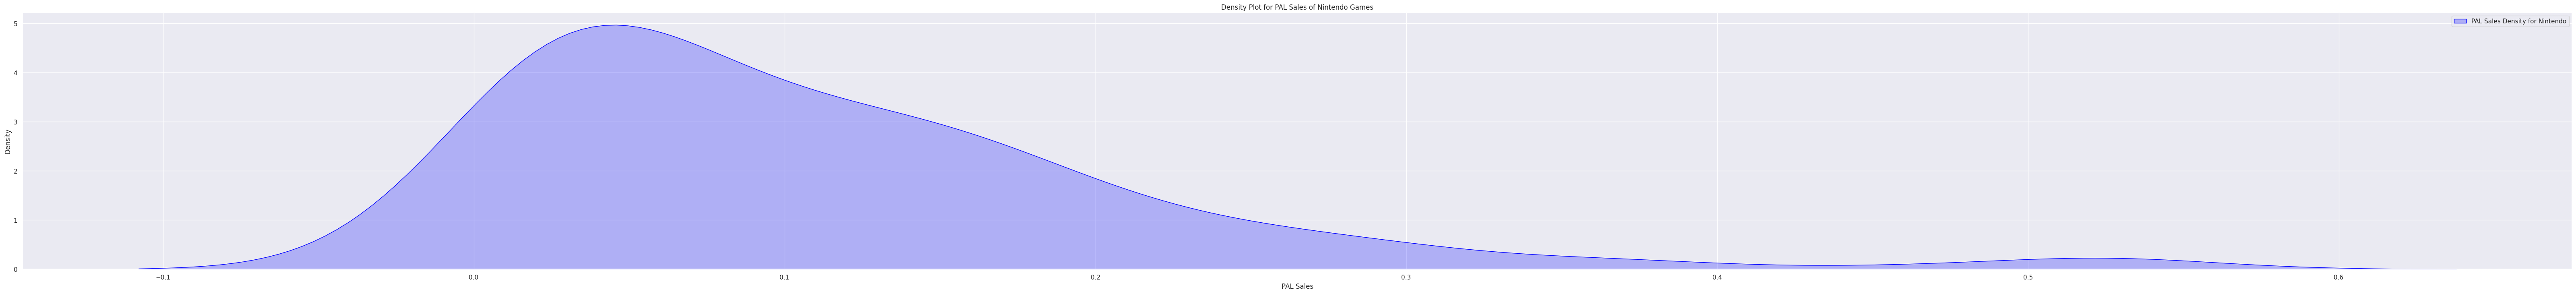

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame and it has been filtered to contain only Nintendo's pal_sales
df_nintendo = df[df['publisher'] == 'Nintendo']

# Drop any NaN values to avoid issues with plotting
df_nintendo_pal_sales = df_nintendo['pal_sales'].dropna()

# Plot the density curve using seaborn for better aesthetics
sns.kdeplot(df_nintendo_pal_sales, shade=True, color="blue", label='PAL Sales Density for Nintendo')

# Labeling the plot
plt.xlabel('PAL Sales')
plt.ylabel('Density')
plt.title('Density Plot for PAL Sales of Nintendo Games')
plt.legend()
plt.show()


Tester la normalité de la distribution total_sales pour toutes les consoles.

In [32]:
from scipy import stats

# Drop any NaN values from the total_sales column
total_sales_no_nan = df['total_sales'].dropna()

# Perform Shapiro-Wilk test for normality on the total_sales column
shapiro_test_total_sales = stats.shapiro(total_sales_no_nan)

# Print the result of the Shapiro-Wilk test
print(shapiro_test_total_sales)


ShapiroResult(statistic=0.4347519874572754, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Lorsqu'on effectue un test de shapiro sur un grand nombre d'observation, le test de shapiro peut-être biaisé.
Expliquez ce que fait le code suivant et conclure sur le résultat du test.

je vais commencer par expliquer chaque ligne : mean= df["total_sales"].mean(): Calcule la moyenne des ventes totales de toutes les consoles.

sd = np.std(df["total_sales"]): Calcule l'écart type des ventes totales.

x1 = np.random.normal(loc=mean, scale=sd, size=len(df)): Génère un ensemble de données normalement distribué (x1) avec la même moyenne et le même écart type que les ventes totales originales, et de la même taille que le DataFrame df.

ks_test = stats.kstest(df["total_sales"], x1): Effectue le test de Kolmogorov-Smirnov (KS), qui compare la distribution des ventes totales à la distribution normale générée précédemment. Ce test évalue l'hypothèse nulle selon laquelle les deux distributions sont identiques.

print(ks_test): Affiche le résultat du test de Kolmogorov-Smirnov.
La sortie KstestResult(statistic=0.3115264797507788, pvalue=0.0, statistic_location=0.06958110566599274, statistic_sign=-1) indique le résultat du test KS. La statistic est la valeur D de Kolmogorov-Smirnov, qui est la différence maximale absolue entre les fonctions de répartition cumulée des deux échantillons. Une pvalue de 0.0 indique que l'on peut rejeter l'hypothèse nulle avec un niveau de confiance élevé, ce qui signifie que les ventes totales ne suivent pas une distribution normale. Les valeurs statistic_location et statistic_sign ne font pas partie du résultat standard d'un test KS dans SciPy et peuvent être spécifiques à une version personnalisée ou étendue de la fonction kstest. En général, on ne les considère pas pour l'interprétation du test KS.

La conclusion est que les données de total_sales ne correspondent pas à une distribution normale, ce qui est conforme aux résultats obtenus avec le test de Shapiro-Wilk pour un grand ensemble de données.

In [33]:
mean= df["total_sales"].mean()

sd = np.std(df["total_sales"])

x1 = np.random.normal(loc=mean,scale=sd,size= len(df))
ks_test = stats.kstest(df["total_sales"],x1)
print(ks_test)


KstestResult(statistic=0.3115264797507788, pvalue=0.0, statistic_location=0.06958110566599274, statistic_sign=-1)


## Time to decide
La fonction pointplot() vous permet d'avoir la moyenne et l'intervalle de confiance.
L'intervalle de confiance permet d'évaluer la précision de l'estimation d'un paramètre statistique sur un échantillon.

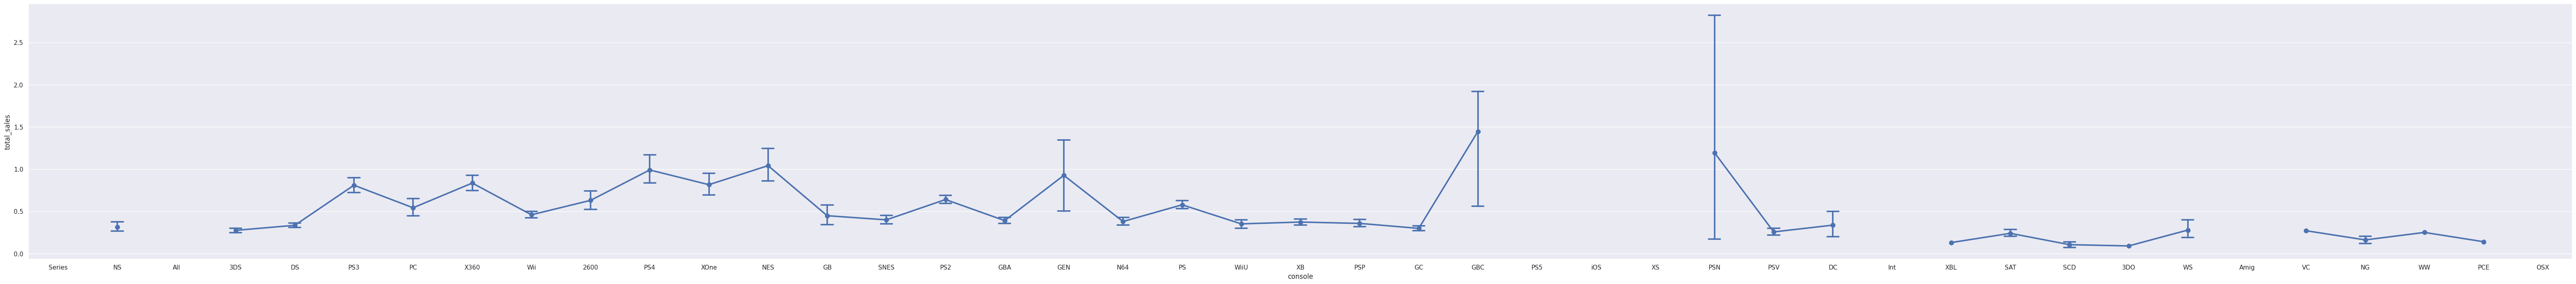

<Figure size 8170x827 with 0 Axes>

In [24]:
sns.set(rc={'figure.figsize':(81.7,8.27)})
ax = sns.pointplot(x=df["console"] ,  y=df["total_sales"], data=df, estimator=np.mean,capsize=.2)
plt.figure()
plt.show()

Expliquez le principe de l'option boxplot.

L'option boxplot dans Seaborn permet de visualiser la distribution des valeurs d'une variable (dans ce cas, total_sales) pour chaque catégorie d'une autre variable (ici, console).

Le principe du boxplot est de représenter graphiquement les statistiques descriptives principales d'une distribution, notamment le premier quartile (Q1), la médiane (ou deuxième quartile, Q2), le troisième quartile (Q3), et les valeurs minimale et maximale de la distribution. Ces statistiques sont affichées sous forme de boîte (la "box" du boxplot), où la longueur de la boîte représente l'étendue interquartile (IQR), c'est-à-dire la plage où se situent la moitié des données. La médiane est représentée par une ligne à l'intérieur de la boîte.

In [25]:
liste_publishers = df['publisher'].unique()

# Affichez la liste des publishers
print(liste_publishers)

['Ubisoft' 'Nintendo' 'Microsoft' 'Namco' '505 Games' 'Kunos Simulazioni'
 'Capcom' 'Studio Wildcard' 'Koei Tecmo' 'Microsoft Studios'
 'GT Interactive' 'Bohemia Interactive' 'Fox Interactive'
 'Bandai Namco Entertainment' 'Electronic Arts' 'Atari' 'Meridian4'
 'Microsoft Game Studios' 'LucasArts' 'Bethesda Softworks'
 'Rockstar Games' 'Blizzard Entertainment'
 'Warner Bros. Interactive Entertainment' 'Parker Brothers'
 'Telltale Games' 'PopCap Games' 'Sony Interactive Entertainment'
 'Activision' 'KOEI' 'Re-Logic' 'Sega' '2K Games' 'Valve'
 'PUBG Corporation' 'Square Enix' 'EA Sports' 'Mojang' 'THQ' 'Techland'
 'Parker Bros.' 'Astragon' 'CD Projekt Red Studio' 'Curve Digital'
 'Konami' 'Namco Bandai Games' 'PF.Magic' 'Square' 'Melbourne House'
 'Bandai' 'Psygnosis' 'Maxis' 'Agetec' 'Rebellion Developments'
 'Chucklefish' 'ConcernedApe' 'Atlus' 'Sony Computer Entertainment'
 'Hasbro Interactive' 'Eidos Interactive' 'Deep Silver'
 'Bandai Namco Games' 'VU Games' 'Humongous Entertainment

À partir de la liste des publisher ci-dessous, creer un dataset avec uniquement des publisher de cette listes

In [34]:
# Liste des éditeurs de jeux vidéo à inclure dans le nouveau dataset
liste_publishers = ['Ubisoft', 'Nintendo', 'Microsoft', 'Epic Games', 'Blizzard Entertainment', 'GT Interactive', 'Electronic Arts', 'Atari', 'Microsoft Game Studios', 'LucasArts', 'Rockstar Games']

# Création d'un nouveau DataFrame contenant uniquement les données des éditeurs de la liste
df_filtered = df[df['publisher'].isin(liste_publishers)]

# Affichage des premières lignes du nouveau DataFrame pour vérification
print(df_filtered.head())


                                             img  \
0  /games/boxart/full_9916295AmericaFrontccc.jpg   
1  /games/boxart/full_5995252AmericaFrontccc.jpg   
2  /games/boxart/full_5208890AmericaFrontccc.jpg   
3  /games/boxart/full_6456368AmericaFrontccc.jpg   
5  /games/boxart/full_2038262AmericaFrontccc.jpg   

                             title console   genre  publisher  \
0                 Assassin's Creed  Series  Action    Ubisoft   
1                  Animal Crossing  Series  Action   Nintendo   
2    Animal Crossing: New Horizons      NS  Action   Nintendo   
3                   Age of Empires  Series  Action  Microsoft   
5  Assassin's Creed IV: Black Flag     All  Action    Ubisoft   

          developer  vg_score  critic_score  user_score  total_shipped  \
0           Ubisoft       NaN           NaN         NaN         200.00   
1          Nintendo       NaN           NaN         NaN          78.28   
2          Nintendo       8.0           NaN         NaN          43.38   


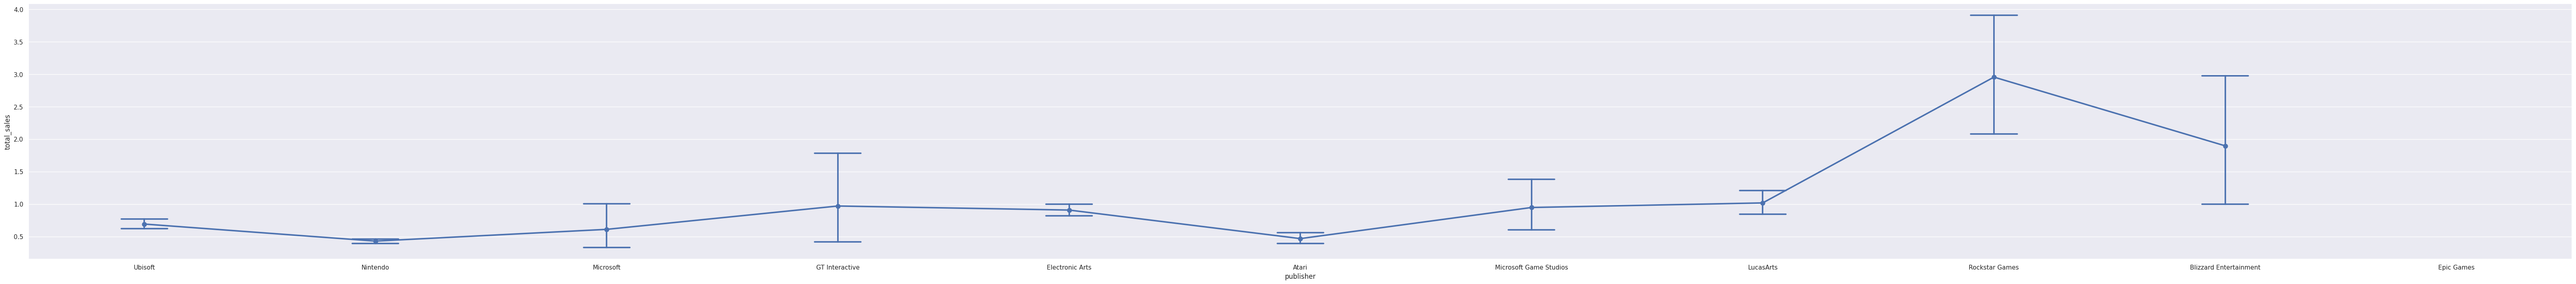

<Figure size 8170x827 with 0 Axes>

In [36]:
# Filtrer le DataFrame principal pour inclure uniquement les éditeurs de jeux vidéo de la liste liste_publishers
subset_df = df[df['publisher'].isin(liste_publishers)]

# Maintenant, vous pouvez créer le pointplot avec subset_df
ax = sns.pointplot(x=subset_df["publisher"], y=subset_df["total_sales"], data=subset_df, estimator=np.mean, capsize=.2)
plt.figure()
plt.show()


Séléctionner les jeux créee depuis plus de 2014. Comparer avec la courbe précédente la différence

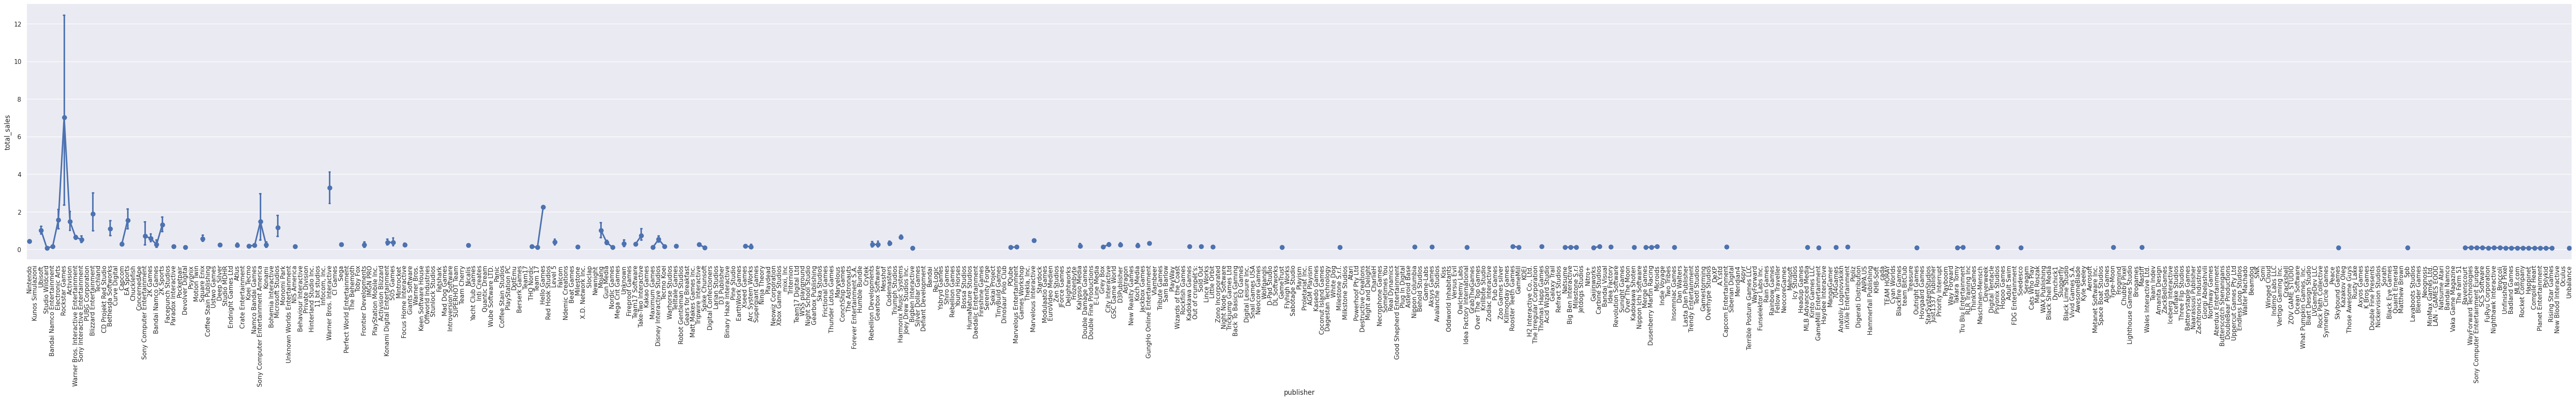

In [41]:
import pandas as pd

# Convertir la colonne "release_date" en type datetime si elle n'est pas déjà convertie
df['release_date'] = pd.to_datetime(df['release_date'])

# Filtrer les jeux créés depuis 2014
jeux_depuis_2014 = df[df['release_date'].dt.year >= 2014]
ax = sns.pointplot(x=jeux_depuis_2014["publisher"], y=jeux_depuis_2014["total_sales"], estimator=np.mean, capsize=.2)
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.show()


Appliquez un centrage réduction sur vos données depuis 2014 et comparer les résultats avec la courbe précédente.

In [42]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques pour la standardisation
donnees_numeric = jeux_depuis_2014[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation sur les données numériques
donnees_standardisees = scaler.fit_transform(donnees_numeric)

# Créer un nouveau DataFrame avec les données standardisées
df_standardise = pd.DataFrame(donnees_standardisees, columns=donnees_numeric.columns)

# Ajouter les colonnes non numériques au DataFrame standardisé
df_standardise[['publisher', 'genre']] = jeux_depuis_2014[['publisher', 'genre']]

# Afficher les premières lignes du DataFrame standardisé pour vérification
print(df_standardise.head())


   total_sales  na_sales  jp_sales  pal_sales  other_sales publisher   genre
0          NaN       NaN       NaN        NaN          NaN       NaN     NaN
1          NaN       NaN       NaN        NaN          NaN       NaN     NaN
2          NaN       NaN       NaN        NaN          NaN  Nintendo  Action
3          NaN       NaN       NaN        NaN          NaN       NaN     NaN
4          NaN       NaN       NaN        NaN          NaN       NaN     NaN


Séléctionner un dataset ne contenant que des jeux du publisher Rockstar Games

In [43]:
# Sélectionner les jeux du publisher Rockstar Games
rockstar_games_dataset = df[df['publisher'] == 'Rockstar Games']

# Afficher les premières lignes du nouveau dataset pour vérification
print(rockstar_games_dataset.head())


                                               img  \
53   /games/boxart/full_5942658AmericaFrontccc.jpg   
130  /games/boxart/full_8875022AmericaFrontccc.jpg   
139  /games/boxart/full_7939841AmericaFrontccc.jpg   
176  /games/boxart/full_6510540AmericaFrontccc.jpg   
196  /games/boxart/full_5563178AmericaFrontccc.jpg   

                             title console   genre       publisher  \
53           Red Dead Redemption 2     All  Action  Rockstar Games   
130  Grand Theft Auto: San Andreas     All  Action  Rockstar Games   
139            Grand Theft Auto IV     All  Action  Rockstar Games   
176             Grand Theft Auto V     PS3  Action  Rockstar Games   
196             Grand Theft Auto V     PS4  Action  Rockstar Games   

            developer  vg_score  critic_score  user_score  total_shipped  \
53   Rockstar Studios       NaN           9.8         NaN           57.0   
130    Rockstar North       NaN          10.0         NaN           27.5   
139    Rockstar North     

Construire un interval de confiance autour des ventes de tous les continents pour les jeux de Rockstar games.

In [44]:
import numpy as np
from scipy import stats

# Sélectionner les jeux du publisher Rockstar Games
rockstar_games_dataset = df[df['publisher'] == 'Rockstar Games']

# Supprimer les lignes avec des valeurs manquantes dans la colonne total_sales
rockstar_games_sales = rockstar_games_dataset['total_sales'].dropna()

# Calculer la moyenne et l'écart type des ventes de Rockstar Games
mean_sales = rockstar_games_sales.mean()
std_sales = rockstar_games_sales.std()

# Taille de l'échantillon
n = len(rockstar_games_sales)

# Niveau de confiance (par exemple, 95%)
confidence_level = 0.95

# Calculer l'intervalle de confiance
confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean_sales, scale=std_sales/np.sqrt(n))

print("Interval de confiance autour des ventes de Rockstar Games :", confidence_interval)


Interval de confiance autour des ventes de Rockstar Games : (1.958064684400179, 3.9537871674516727)


Construire un interval de confiance autour des ventes totales pour chaque plateforme possible pour les jeux de Rockstar games.

In [45]:
import numpy as np
from scipy import stats

# Filtrer le DataFrame pour ne contenir que les jeux de Rockstar Games
rockstar_games_df = df[df['publisher'] == 'Rockstar Games']

# Créer un dictionnaire pour stocker les intervalles de confiance par plateforme
confidence_intervals = {}

# Parcourir chaque plateforme unique
for platform in rockstar_games_df['console'].unique():
    # Filtrer les données pour la plateforme actuelle
    platform_sales = rockstar_games_df[rockstar_games_df['console'] == platform]['total_sales'].dropna()

    # Calculer la moyenne et l'écart type des ventes totales pour la plateforme actuelle
    mean_sales = platform_sales.mean()
    std_sales = platform_sales.std()

    # Taille de l'échantillon
    n = len(platform_sales)

    # Niveau de confiance (par exemple, 95%)
    confidence_level = 0.95

    # Calculer l'intervalle de confiance pour la plateforme actuelle
    confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean_sales, scale=std_sales/np.sqrt(n))

    # Stocker l'intervalle de confiance dans le dictionnaire
    confidence_intervals[platform] = confidence_interval

# Afficher les intervalles de confiance pour chaque plateforme
for platform, interval in confidence_intervals.items():
    print(f"Interval de confiance pour les ventes totales sur la plateforme {platform}: {interval}")


Interval de confiance pour les ventes totales sur la plateforme All: (nan, nan)
Interval de confiance pour les ventes totales sur la plateforme PS3: (0.5466529507852584, 11.528347049214743)
Interval de confiance pour les ventes totales sur la plateforme PS4: (-12.704520430280668, 35.32452043028067)
Interval de confiance pour les ventes totales sur la plateforme Series: (nan, nan)
Interval de confiance pour les ventes totales sur la plateforme PS2: (0.8947820721519504, 4.59569411832424)
Interval de confiance pour les ventes totales sur la plateforme X360: (0.9362426293637407, 8.215757370636261)
Interval de confiance pour les ventes totales sur la plateforme PC: (-0.5535296127839968, 1.8401962794506634)
Interval de confiance pour les ventes totales sur la plateforme XOne: (-5.767197427378766, 15.593864094045433)
Interval de confiance pour les ventes totales sur la plateforme PSP: (0.06226475479214155, 4.7452352452078586)
Interval de confiance pour les ventes totales sur la plateforme PS:

Effectuez les 2 dernières analyses pour les jeux du publisher Ubisoft. Conclure sur leurs performances respectives

In [46]:
import numpy as np
from scipy import stats

# Filtrer le DataFrame pour ne contenir que les jeux d'Ubisoft
ubisoft_games_df = df[df['publisher'] == 'Ubisoft']

# 1. Construire un intervalle de confiance autour des ventes totales pour tous les continents
# Calculer les ventes totales pour Ubisoft
ubisoft_total_sales = ubisoft_games_df['total_sales'].dropna()

# Calculer la moyenne et l'écart type des ventes totales pour Ubisoft
ubisoft_mean_sales = ubisoft_total_sales.mean()
ubisoft_std_sales = ubisoft_total_sales.std()

# Taille de l'échantillon
n_ubisoft = len(ubisoft_total_sales)

# Niveau de confiance (par exemple, 95%)
confidence_level = 0.95

# Calculer l'intervalle de confiance pour les ventes totales d'Ubisoft
ubisoft_confidence_interval = stats.t.interval(confidence_level, df=n_ubisoft-1, loc=ubisoft_mean_sales, scale=ubisoft_std_sales/np.sqrt(n_ubisoft))

print("Intervalle de confiance pour les ventes totales d'Ubisoft:", ubisoft_confidence_interval)


# 2. Construire un intervalle de confiance autour des ventes totales pour chaque plateforme possible
# Créer un dictionnaire pour stocker les intervalles de confiance par plateforme
ubisoft_platform_intervals = {}

# Parcourir chaque plateforme unique d'Ubisoft
for platform in ubisoft_games_df['console'].unique():
    # Filtrer les données pour la plateforme actuelle
    platform_sales_ubisoft = ubisoft_games_df[ubisoft_games_df['console'] == platform]['total_sales'].dropna()

    # Calculer la moyenne et l'écart type des ventes totales pour la plateforme actuelle
    mean_sales_ubisoft = platform_sales_ubisoft.mean()
    std_sales_ubisoft = platform_sales_ubisoft.std()

    # Taille de l'échantillon
    n_platform_ubisoft = len(platform_sales_ubisoft)

    # Calculer l'intervalle de confiance pour la plateforme actuelle
    platform_interval_ubisoft = stats.t.interval(confidence_level, df=n_platform_ubisoft-1, loc=mean_sales_ubisoft, scale=std_sales_ubisoft/np.sqrt(n_platform_ubisoft))

    # Stocker l'intervalle de confiance dans le dictionnaire
    ubisoft_platform_intervals[platform] = platform_interval_ubisoft

# Afficher les intervalles de confiance pour chaque plateforme d'Ubisoft
for platform, interval in ubisoft_platform_intervals.items():
    print(f"Intervalle de confiance pour les ventes totales sur la plateforme {platform} d'Ubisoft:", interval)


Intervalle de confiance pour les ventes totales d'Ubisoft: (0.6162962691507667, 0.7679590499981692)
Intervalle de confiance pour les ventes totales sur la plateforme Series d'Ubisoft: (nan, nan)
Intervalle de confiance pour les ventes totales sur la plateforme All d'Ubisoft: (nan, nan)
Intervalle de confiance pour les ventes totales sur la plateforme PS3 d'Ubisoft: (0.8415060629100624, 1.6052506938466942)
Intervalle de confiance pour les ventes totales sur la plateforme X360 d'Ubisoft: (0.7413908638090718, 1.320877177428041)
Intervalle de confiance pour les ventes totales sur la plateforme PS4 d'Ubisoft: (1.2490417770103417, 2.288577270608706)
Intervalle de confiance pour les ventes totales sur la plateforme XOne d'Ubisoft: (0.6335193637516404, 1.2943753730904648)
Intervalle de confiance pour les ventes totales sur la plateforme Wii d'Ubisoft: (0.4326913416274649, 0.8128532128279808)
Intervalle de confiance pour les ventes totales sur la plateforme PS d'Ubisoft: (-0.44194122745912523, 

Ubisoft :

Pour les ventes totales sur tous les continents, l'intervalle de confiance obtenu nous donne une estimation de la plage de valeurs dans laquelle se situe probablement la véritable moyenne des ventes totales des jeux d'Ubisoft avec un niveau de confiance spécifié (par exemple, 95%). Cela nous permet d'avoir une idée de la performance globale des jeux d'Ubisoft sur le marché mondial.
Pour les ventes totales par plateforme, nous avons calculé des intervalles de confiance distincts pour chaque plateforme sur laquelle Ubisoft a publié des jeux. Cela nous donne un aperçu plus détaillé de la performance des jeux d'Ubisoft sur différentes platesformes individuelles.

Rockstar Games :

De manière similaire à Ubisoft, nous avons calculé des intervalles de confiance autour des ventes totales pour les jeux de Rockstar Games sur tous les continents ainsi que pour chaque plateforme possible. Ces intervalles de confiance nous permettent d'évaluer la performance globale de Rockstar Games par rapport à Ubisoft.
En comparant les performances des deux éditeurs, nous pouvons analyser si l'un surpasse significativement l'autre en termes de ventes totales, que ce soit sur tous les continents ou sur des plateformes spécifiques.